## Spotify Müzik Dinleme Geçmişimin Taylor Swift Odaklı Analizi

İki farklı data geldiği için önce ikisini tek bir dinleme geçmişi olarak birleştirdim.

In [47]:
import json
import pandas as pd

with open('StreamingHistory_music_0.json', 'r', encoding='utf-8') as f1:
    data1 = json.load(f1)

with open('StreamingHistory_music_1.json', 'r', encoding='utf-8') as f2:
    data2 = json.load(f2)

In [49]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [51]:
df = pd.concat([df1, df2], ignore_index=True)

In [53]:
df['endTime'] = pd.to_datetime(df['endTime'])
df = df.sort_values('endTime').reset_index(drop=True)

In [55]:
df.to_csv('birlesik_dinleme_gecmisi.csv', index=False)

In [59]:
df.describe

<bound method NDFrame.describe of                   endTime                   artistName  \
0     2024-07-19 00:02:00                 Taylor Swift   
1     2024-07-22 05:55:00                 Taylor Swift   
2     2024-07-22 05:58:00                 Taylor Swift   
3     2024-07-22 06:02:00                 Taylor Swift   
4     2024-07-22 06:06:00                 Taylor Swift   
...                   ...                          ...   
16515 2025-07-22 23:45:00  Owen & Moley Ó Súilleabháin   
16516 2025-07-22 23:48:00  Owen & Moley Ó Súilleabháin   
16517 2025-07-22 23:49:00  Owen & Moley Ó Súilleabháin   
16518 2025-07-22 23:53:00                 Taylor Swift   
16519 2025-07-22 23:58:00                 Taylor Swift   

                                            trackName  msPlayed  
0      Better Man (Taylor's Version) (From The Vault)     38475  
1                                               Peter    125981  
2                                               Peter    157977  
3    

In [61]:
df.size

66080

In [63]:
# Zaman sütunu datetime'a dönüştür
df['endTime'] = pd.to_datetime(df['endTime'])

# Ekstra tarih sütunları
df['date'] = df['endTime'].dt.date
df['month'] = df['endTime'].dt.month
df['day'] = df['endTime'].dt.day
df['weekday'] = df['endTime'].dt.day_name()
df['hour'] = df['endTime'].dt.hour
df['year'] = df['endTime'].dt.year

In [65]:
print("Veriler şu tarihler arasında:")
print(f"{df['endTime'].min()}  →  {df['endTime'].max()}")

Veriler şu tarihler arasında:
2024-07-19 00:02:00  →  2025-07-22 23:58:00


Dinleme geçmişi 19 Temmuz 2024'ten 22 Temmuz 2025'e kadar olan verileri yani geçtiğimiz seneyi içermekte.

## En çok müzik dinlediğim ay ve gün

In [86]:
# En çok dinlenen ay
print("En çok dinlenen ay:")
print(df['month'].value_counts().idxmax())

# En çok dinlenen gün
print("En çok dinlenen gün:")
print(df['date'].value_counts().idxmax())
topday = df['date'].value_counts().idxmax()

En çok dinlenen ay:
4
En çok dinlenen gün:
2025-04-29


### Do you really wanna know where I was April 29th? :)

In [134]:
top10_sarkilar = gunluk_df['trackName'].value_counts().head(10)

print(f"{topday} tarihinde en çok dinlediğin 10 şarkı:\n")
print(top10_sarkilar)

2025-04-29 tarihinde en çok dinlediğin 10 şarkı:

trackName
all-american bitch    4
High Infidelity       3
So Long, London       2
Perfect Places        2
Ride                  2
Supercut              2
Bad Reviews           2
What Was That         2
long story short      2
Green Light           2
Name: count, dtype: int64


In [96]:
en_cok_sanatci = gunluk_df['artistName'].value_counts().idxmax()
print(f"Aynı gün en çok dinlediğin sanatçı: {en_cok_sanatci}")

Aynı gün en çok dinlediğin sanatçı: Taylor Swift


In [94]:
gunluk_df = df[df['date'] == topday]
en_cok_sarki = gunluk_df['trackName'].value_counts().idxmax()
print(f"{topday} tarihinde en çok dinlediğin şarkı: {en_cok_sarki}")


2025-04-29 tarihinde en çok dinlediğin şarkı: all-american bitch


NOT: High Infidelity şarkısında "Do you really wanna know where I was April 29th? diye bir söz geçer, bu nedenle o gün bu şarkı özellikle dinlenir. Ben de 29 Nisan'da en çok dinlediğim şarkının High Infidelity çıkacağını düşündüm ama all-american-bitch 1 fazla dinlemeyle HI'yi geçmiş. Yine de o gün en çok dinlediğim sanatçı Taylor Swift olmuş.

## En Çok Dinlediğim Sanatçı (Acaba Kim :) ) 

In [111]:
print("En çok dinlediğin sanatçı:")
most_listened_artist = df['artistName'].value_counts().idxmax()
print(most_listened_artist, "duhh")

En çok dinlediğin sanatçı:
Taylor Swift duhh


## Son 1 Yılda En Çok Dinlediğim 10 Sanatçı

En çok dinlediğim 10 sanatçıyı dinlediğim toplam saat ve şarkı sayısıyla birlikte tablo halinde göstermek istiyorum.

In [142]:
import pandas as pd

# Sanatçı bazında toplam dinleme süresi (saat)
saat_ozet = (
    df.groupby('artistName')['msPlayed']
    .sum()
    .div(1000 * 60 * 60)  # ms -> saat
)

# En çok dinlenen 10 sanatçıyı al
top10_saat = saat_ozet.sort_values(ascending=False).head(10)

# Tüm veri setindeki toplam dinleme süresi (saat)
toplam_sure_tum_veri = df['msPlayed'].sum() / (1000 * 60 * 60)

# DataFrame oluştur
top10_df = top10_saat.reset_index(name='Toplam Dinleme Süresi (saat)')

# Yüzde hesapla - tüm veri üzerinden
top10_df['Dinleme Yüzdesi (%)'] = (
    (top10_df['Toplam Dinleme Süresi (saat)'] / toplam_sure_tum_veri) * 100
).round(2)

print(top10_df)


          artistName  Toplam Dinleme Süresi (saat)  Dinleme Yüzdesi (%)
0       Taylor Swift                    322.071564                39.92
1      Chappell Roan                     52.811182                 6.55
2  Sabrina Carpenter                     42.536362                 5.27
3       Lana Del Rey                     20.199771                 2.50
4              Lorde                     18.984705                 2.35
5     Olivia Rodrigo                     16.583036                 2.06
6             Mitski                     16.490085                 2.04
7          Lady Gaga                     15.417811                 1.91
8           Coldplay                     12.667122                 1.57
9            Pinhani                     11.257640                 1.40


## En Çok Dinlediğim 10 Sanatçının Dinlediğim Toplam ve Farklı (Unique) Şarkı Sayısı 

In [221]:
# Sanatçı bazında toplam dinleme ve farklı şarkı sayısı
artist_summary = df.groupby('artistName').agg({
    'trackName': ['count', 'nunique']
})

# Sütunları düzleştir
artist_summary.columns = ['Listen_Count', 'Unique_Song_Count']

# En çok dinlenen ilk 10 sanatçı
top10_artists = artist_summary.sort_values(by='Listen_Count', ascending=False).head(10)

# Dinleme yüzdesi
top10_artists['Listen_Percentage (%)'] = (top10_artists['Listen_Count'] / top10_artists['Listen_Count'].sum() * 100).round(2)

# İndeksi sıfırla ve sütun adlarını düzenle
top10_artists = top10_artists.reset_index()
top10_artists.columns = ['Sanatçı', 'Toplam Dinlenme Sayısı', 'Unique Şarkı Sayısı', 'Dinleme Yüzdesi (%)']

top10_artists


,Sanatçı,Toplam Dinlenme Sayısı,Unique Şarkı Sayısı,Dinleme Yüzdesi (%)
0,Taylor Swift,5668,335,56.44
1,Chappell Roan,1102,24,10.97
2,Sabrina Carpenter,1022,28,10.18
3,Olivia Rodrigo,404,31,4.02
4,Lorde,378,39,3.76
5,Mitski,349,39,3.48
6,Lana Del Rey,318,68,3.17
7,Lady Gaga,309,38,3.08
8,Coldplay,249,106,2.48
9,Pinhani,244,50,2.43


## En Çok Dinlediğim 10 Sanatçı - Top10 İçindeki Dinleme Süresi Dağılımı

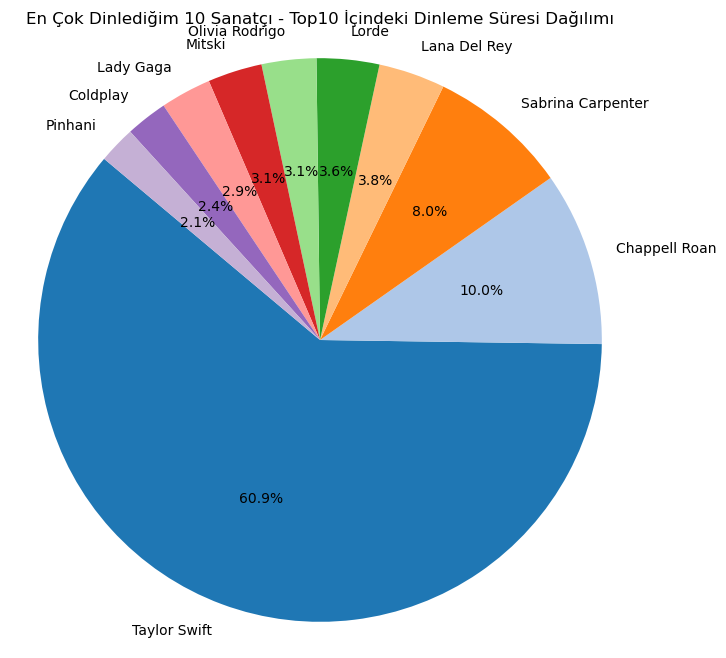

In [150]:
# Top 10 sanatçının süresi
top10_toplam_sure = top10_df['Toplam Dinleme Süresi (saat)'].sum()

# Her sanatçının top10 içindeki yüzdesi
top10_df['Top10 İçindeki Yüzde'] = (top10_df['Toplam Dinleme Süresi (saat)'] / top10_toplam_sure) * 100

# Pasta grafikte bu sütunu kullan
plt.figure(figsize=(8,8))
plt.pie(
    top10_df['Top10 İçindeki Yüzde'],
    labels=top10_df['artistName'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('En Çok Dinlediğim 10 Sanatçı - Top10 İçindeki Dinleme Süresi Dağılımı')
plt.axis('equal')
plt.show()



## Taylor Swift'in En Çok Dinlediğim 10 Şarkısı (Dinleme Sayısı Bazında)

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taylor Swift filtrele
ts_df = df[df['artistName'] == 'Taylor Swift']

# En çok dinlenen 10 şarkı
top10_songs = ts_df['trackName'].value_counts().head(10).reset_index()
top10_songs.columns = ['Şarkı', 'Dinlenme Sayısı']

print(top10_songs)


                                               Şarkı  Dinlenme Sayısı
0  All Too Well (10 Minute Version) (Taylor's Ver...              133
1                                     Guilty as Sin?              118
2                                             august              107
3                      Fortnight (feat. Post Malone)               84
4                                    How Did It End?               83
5               My Boy Only Breaks His Favorite Toys               82
6                                       The Prophecy               76
7                              Fresh Out The Slammer               75
8                                    So Long, London               74
9                    I Can Do It With a Broken Heart               72


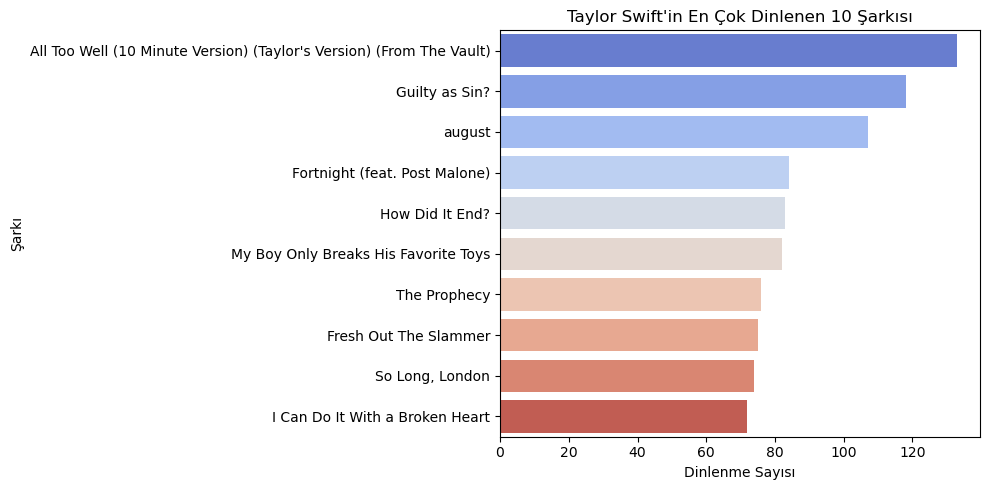

In [166]:
plt.figure(figsize=(10,5))
sns.barplot(data=top10_songs, y='Şarkı', x='Dinlenme Sayısı', hue='Şarkı', dodge=False, palette='coolwarm', legend=False)
plt.title("Taylor Swift'in En Çok Dinlenen 10 Şarkısı")
plt.xlabel("Dinlenme Sayısı")
plt.ylabel("Şarkı")
plt.tight_layout()
plt.show()



## Taylor Swift'in En Çok Dinlediğim 10 Şarkısı (Dinleme Dakikası Bazında)

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sadece Taylor Swift şarkıları
ts_df = df[df['artistName'] == 'Taylor Swift']

# Her şarkı için toplam dinleme süresi (milisaniyeden dakikaya çevir)
top10_songs_duration = ts_df.groupby('trackName')['msPlayed'].sum().sort_values(ascending=False).head(10)
top10_songs_duration = (top10_songs_duration / 60000).reset_index()
top10_songs_duration.columns = ['Şarkı', 'Toplam Dinleme Süresi (dakika)']

print(top10_songs_duration)


                                               Şarkı  \
0  All Too Well (10 Minute Version) (Taylor's Ver...   
1                                     Guilty as Sin?   
2                                             august   
3                                               loml   
4                                    How Did It End?   
5                                    So Long, London   
6                                       The Prophecy   
7                      Fortnight (feat. Post Malone)   
8               My Boy Only Breaks His Favorite Toys   
9                              Fresh Out The Slammer   

   Toplam Dinleme Süresi (dakika)  
0                     1086.124350  
1                      446.864083  
2                      343.806050  
3                      313.530617  
4                      300.226583  
5                      297.717483  
6                      285.641667  
7                      284.080183  
8                      250.290550  
9                      

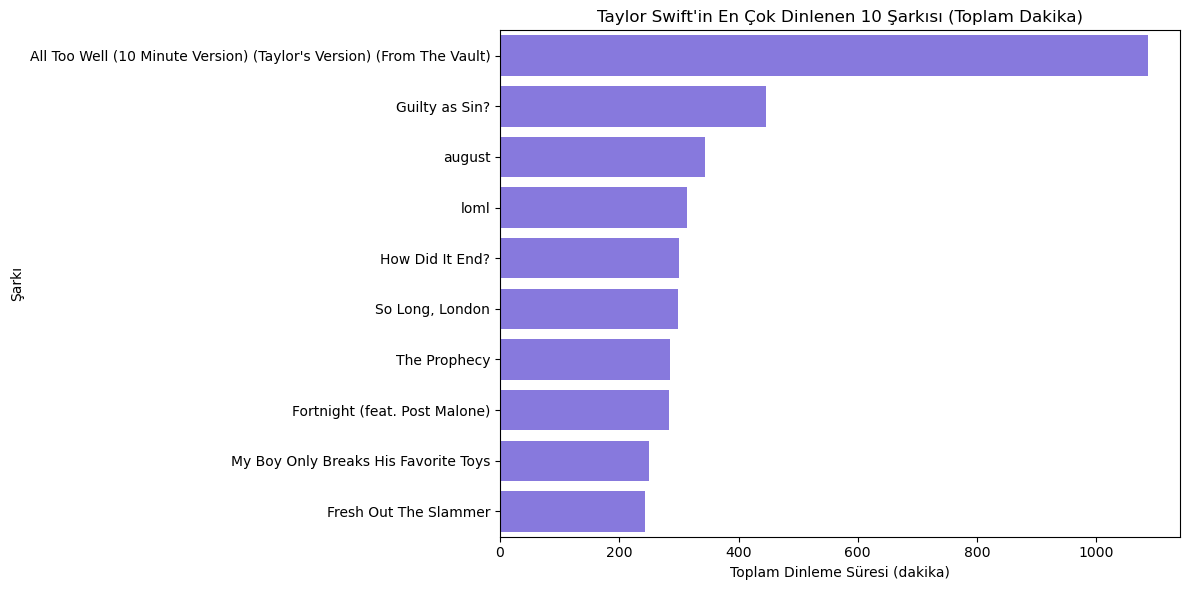

In [173]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top10_songs_duration,
    y='Şarkı',
    x='Toplam Dinleme Süresi (dakika)',
    color='mediumslateblue'
)
plt.title("Taylor Swift'in En Çok Dinlenen 10 Şarkısı (Toplam Dakika)")
plt.xlabel("Toplam Dinleme Süresi (dakika)")
plt.ylabel("Şarkı")
plt.tight_layout()
plt.show()


Önceki grafikte olmayan loml burda eklendi.

## En Çok Taylor Swift Dinlenen Gün

In [182]:
# endTime'i datetime formatına çevir
df['endTime'] = pd.to_datetime(df['endTime'])

# Sadece Taylor Swift şarkılarını al
ts_df = df[df['artistName'] == 'Taylor Swift'].copy()  # <- copy() ekledik, en temizi

# Yeni sütunları ekle
ts_df['date'] = ts_df['endTime'].dt.date
ts_df['month'] = ts_df['endTime'].dt.month
ts_df['month_name'] = ts_df['endTime'].dt.strftime('%B')
ts_df['day'] = ts_df['endTime'].dt.day




In [184]:
most_listened_day = ts_df.groupby('date')['msPlayed'].sum().sort_values(ascending=False).head(1)
print("En çok Taylor Swift dinlenen gün:\n", most_listened_day)

En çok Taylor Swift dinlenen gün:
 date
2025-04-20    23947849
Name: msPlayed, dtype: int64


Ay bazında Taylor Swift dinleme süreleri:
 month_name
April        151934300
September    132624852
November     110833158
December     105091873
January      103667462
August       100689780
July          94894436
May           82640195
June          76607413
October       75500002
February      65058017
March         59916143
Name: msPlayed, dtype: int64


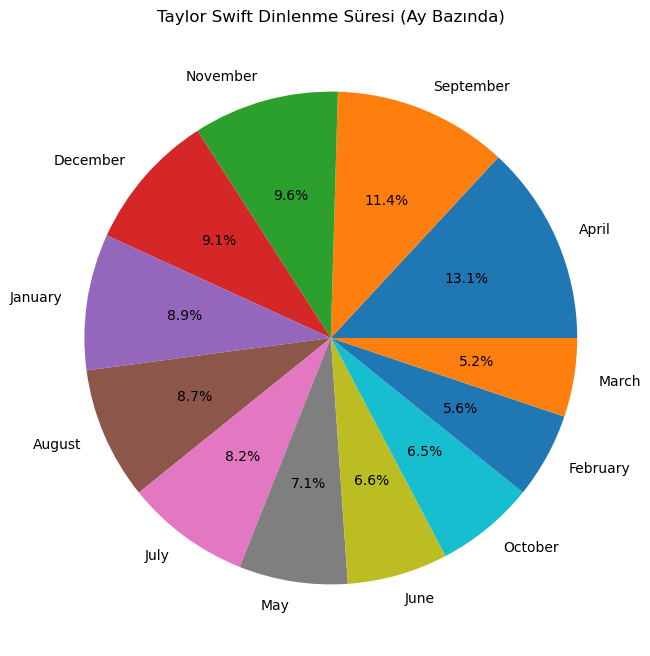

In [188]:
most_listened_month = ts_df.groupby('month_name')['msPlayed'].sum().sort_values(ascending=False)
print("Ay bazında Taylor Swift dinleme süreleri:\n", most_listened_month)

most_listened_month.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), title='Taylor Swift Dinlenme Süresi (Ay Bazında)')
plt.ylabel('')
plt.show()


Geçen sene en çok Nisan ayında dinlememin nedeni o ay TTPD albümünün çıkması olabilir.

## En Çok Dinlenen Taylor Swift Şarkıları (En Çok Dinlenen Günde)

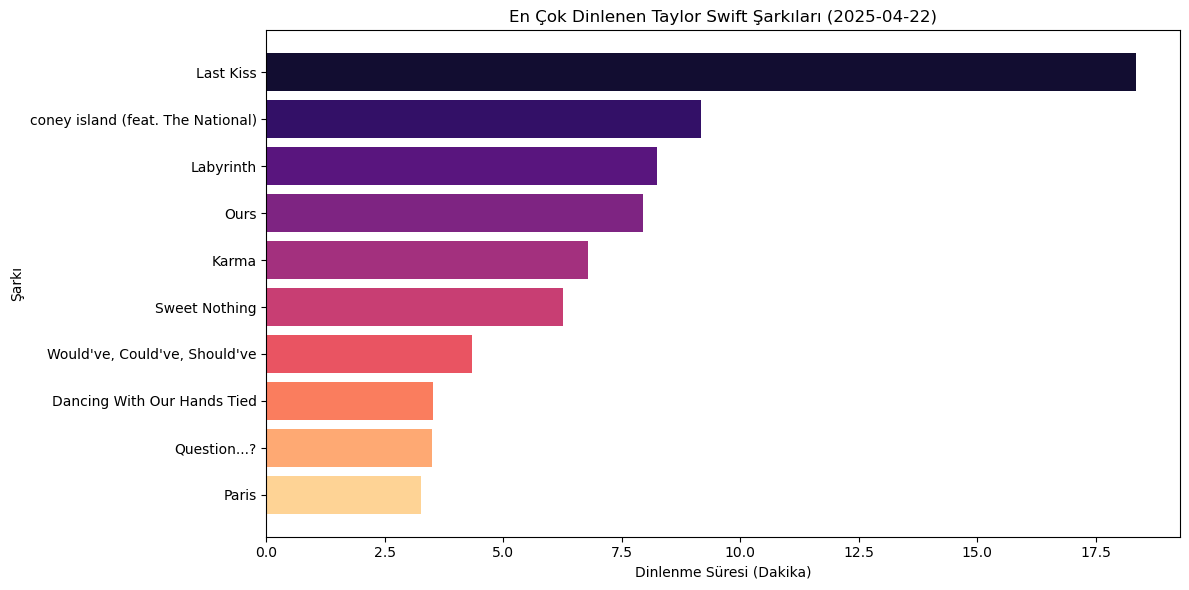

In [278]:
import matplotlib.pyplot as plt

colors = sns.color_palette("magma", n_colors=len(song_listen))

plt.figure(figsize=(12, 6))
bars = plt.barh(song_listen['trackName'], song_listen['Dinlenme Süresi (Dakika)'], color=colors)
plt.xlabel("Dinlenme Süresi (Dakika)")
plt.ylabel("Şarkı")
plt.title(f"En Çok Dinlenen Taylor Swift Şarkıları ({top_day})")
plt.gca().invert_yaxis()  # En çok dinlenenden başlayarak sıralar
plt.tight_layout()
plt.show()


## Mevsimlere Göre Taylor Swift Dinleme Oranları

Önce ayları mevsimlere bölüyorum.

In [205]:
# Ay bilgisine göre mevsim ekleyelim
def ay_to_mevsim(ay):
    if ay in [12, 1, 2]:
        return 'Kış'
    elif ay in [3, 4, 5]:
        return 'İlkbahar'
    elif ay in [6, 7, 8]:
        return 'Yaz'
    elif ay in [9, 10, 11]:
        return 'Sonbahar'

ts_df['season'] = ts_df['month'].apply(ay_to_mevsim)


In [207]:
# Mevsime göre toplam dinlenme süresi (milisaniye)
season_summary = ts_df.groupby('season')['msPlayed'].sum().sort_values(ascending=False)

# Saat cinsine çevirelim
season_summary_hours = (season_summary / (1000 * 60 * 60)).round(2)

# Yüzdelik oran
season_percentage = (season_summary / season_summary.sum() * 100).round(2)

# Son tablo
season_df = pd.DataFrame({
    'Toplam Dinleme Süresi (saat)': season_summary_hours,
    'Dinleme Oranı (%)': season_percentage
}).sort_values(by='Toplam Dinleme Süresi (saat)', ascending=False)

season_df


,Toplam Dinleme Süresi (saat),Dinleme Oranı (%)
season,,
Sonbahar,88.60,27.51
İlkbahar,81.80,25.40
Kış,76.06,23.62
Yaz,75.61,23.48


Oranlar birbirine çok yakın yani yıl boyunca SÜREKLİ Taylor Swift dinliyorum ama yine de sonbaharda artış var.

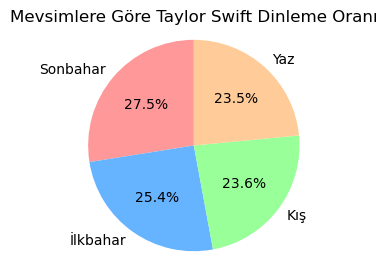

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.pie(season_df['Toplam Dinleme Süresi (saat)'], labels=season_df.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Mevsimlere Göre Taylor Swift Dinleme Oranı")
plt.axis('equal')
plt.show()


## Albüm Bilgisini Dinleme Geçmişine Ekleme

In [231]:
import json

with open("YourLibrary.json", encoding='utf-8') as f:
    data = json.load(f)

# Anahtarları listele
print(data.keys())


dict_keys(['tracks', 'albums', 'shows', 'episodes', 'bannedTracks', 'artists', 'bannedArtists', 'other'])


In [233]:
data['tracks'][0]

{'artist': 'Taylor Swift',
 'album': 'evermore',
 'track': 'marjorie',
 'uri': 'spotify:track:12ntTeqEeTg7GAVpe8Mhpl'}

## En Çok Dinlediğim Taylor Swift Albümleri

In [258]:
# YourLibrary dosyasını oku
with open("YourLibrary.json", encoding='utf-8') as f:
    data = json.load(f)
library_df = pd.DataFrame(data['tracks'])

# Sütun isimlerini eşitle (history_df'de trackName, artistName; library_df'de track, artist)
library_df = library_df.rename(columns={'track': 'trackName', 'artist': 'artistName'})

# Dinleme geçmişi ile albüm bilgilerini birleştir
merged_df = pd.merge(df, library_df[['trackName', 'artistName', 'album']], on=['trackName', 'artistName'], how='left')

# Taylor Swift filtrele
ts_df = merged_df[merged_df['artistName'] == 'Taylor Swift']

# 6. Albüm bazında toplam dinleme süresi (ms)
album_listen_time = ts_df.groupby('album')['msPlayed'].sum().reset_index()

# 7. Süreyi saate çevir
album_listen_time['Saat'] = album_listen_time['msPlayed'] / (1000*60*60)

# 8. Albüm bazında farklı şarkı sayısı
album_song_count = ts_df.groupby('album')['trackName'].nunique().reset_index()
album_song_count.columns = ['album', 'unique_songs']

# 9. İki tabloyu birleştir
album_summary = pd.merge(album_listen_time, album_song_count, on='album')

# 10. Sütunları düzenle
album_summary = album_summary.rename(columns={'album': 'Albüm', 'Saat': 'Toplam Dinleme Süresi (Saat)', 'unique_songs': 'Farklı Şarkı Sayısı'})

# 11. En çok dinlenen 10 albüm
album_summary_top10 = album_summary.sort_values(by='Toplam Dinleme Süresi (Saat)', ascending=False).head(10)

# 12. Sadece özet sütunları al
album_summary_top10_clean = album_summary_top10[['Albüm', 'Toplam Dinleme Süresi (Saat)', 'Farklı Şarkı Sayısı']]

album_summary_top10_clean

,Albüm,Toplam Dinleme Süresi (Saat),Farklı Şarkı Sayısı
24,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,70.065869,20
32,evermore,36.750435,17
33,folklore,33.366524,17
18,Red (Taylor's Version),22.988511,26
35,reputation,21.790159,14
8,Fearless (Taylor's Version),21.442434,26
13,Lover,20.330930,18
15,Midnights,18.512191,20
21,Speak Now (Taylor's Version),15.419510,21
20,Speak Now,8.810738,10


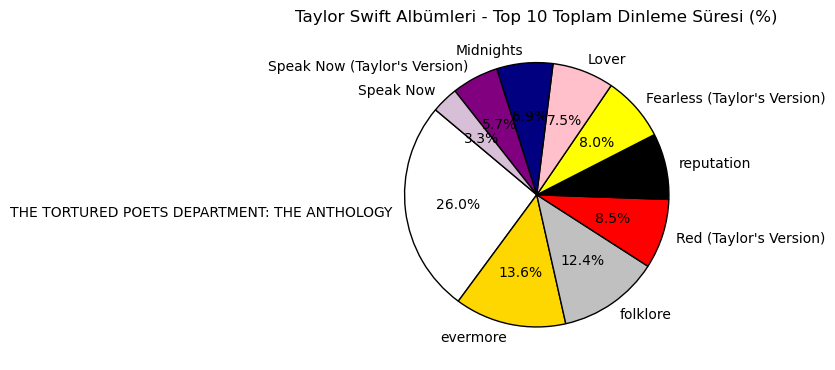

In [266]:
import matplotlib.pyplot as plt

colors = [
    '#FFFFFF',  # Beyaz
    '#FFD700',  # Altın
    '#C0C0C0',  # Gümüş
    '#FF0000',  # Kırmızı
    '#000000',  # Siyah
    '#FFFF00',  # Sarı
    '#FFC0CB',  # Pembe
    '#000080',  # Lacivert
    '#800080',  # Mor
    '#D8BFD8'   # Açık Mor
]

plt.figure(figsize=(8,8))
plt.pie(
    album_summary_top10_clean['Toplam Dinleme Süresi (Saat)'],
    labels=album_summary_top10_clean['Albüm'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Taylor Swift Albümleri - Top 10 Toplam Dinleme Süresi (%)")
plt.tight_layout()
plt.show()



Geçen sene en çok TTPD'yi dinledim çünkü albüm geçen sene çıktı, diğerleri daha eski albümler.

Analiz şu anlık burada bitiyor. Daha ayrıntılı keşifler yapmak için sabırsızlanıyorum. :)